## Import

In [ ]:
!pip install transformers

* tokenizer

In [129]:
from transformers import GPT2LMHeadModel
from transformers import PreTrainedTokenizerFast

import torch
import numpy as np
import pandas as pd

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [ ]:
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>')

In [2]:
tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o")

['▁안녕',
 '하',
 '세',
 '요.',
 '▁한국어',
 '▁G',
 'P',
 'T',
 '-2',
 '▁입',
 '니다.',
 '😤',
 ':)',
 'l^o']

* kogpt2

In [51]:
model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')

In [94]:
text = '근육이 커지기 위해서는'

In [95]:
input_ids = tokenizer.encode(text, return_tensors='pt')

In [104]:
gen_ids = model.generate(input_ids,
                           max_length=140,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True,output_hidden_states=True)

In [105]:
generated = tokenizer.decode(gen_ids[0])
print(generated)

근육이 커지기 위해서는 무엇보다 규칙적인 생활습관이 중요하다.
특히, 아침식사는 단백질과 비타민이 풍부한 과일과 채소를 많이 섭취하는 것이 좋다.
또한 하루 30분 이상 충분한 수면을 취하는 것도 도움이 된다.
아침 식사를 거르지 않고 규칙적으로 운동을 하면 혈액순환에 도움을 줄 뿐만 아니라 신진대사를 촉진해 체내 노폐물을 배출하고 혈압을 낮춰준다.
운동은 하루에 10분 정도만 하는 게 좋으며 운동 후에는 반드시 스트레칭을 통해 근육량을 늘리고 유연성을 높여야 한다.
운동 후 바로 잠자리에 드는 것은 피해야 하며 특히 아침에 일어나면 몸이 피곤해지기 때문에 무리하게 움직이면 오히려 역효과가 날 수도 있다.
운동을 할 때는 몸을 따뜻하게 하고 땀은 잘 흡수하도록 해야 한다.


* kis

In [ ]:
def get_embedding(text, tok, model):
    input_ids = tok.encode(text, return_tensors='pt')
    embedding = np.mean(model.transformer.wte.weight[input_ids].detach().numpy(), axis = 1)
    return embedding

In [127]:
text1 = "기존에 해외주식 실시간지연호가는 지연시세 제공으로 설계되었으나 검토 결과 미국시장의 경우 무료실시간호가로 변경 제공하기로 결정하여 추가 개발 완료되었습니다. (23.2.1 기준)따라서 포털 - API문서에 아래 두 가지 메뉴로 나누어져 있으니 참고 부탁드립니다."
text2 = '안녕하세요 해외주식 주문체결내역 조회하는데 체결내역 미체결내역 구분해서 조회가 안되고 전체 조회만 됩니다 (모의 계좌 아니고 실계좌) 이렇게 하면 전달받는 값이 없는데.. API에 이상없는것 맞나요?'
text3 = "20개의 해외선물 종목에 대해 시세수신을 진행하던중  1/31일 16시경 네트웍이 끊겼습니다 idc에서 프로그램을 운영하고 있는데 수신을 하고있는데 혹시 한국투자의 문제로 끊긴것인가요? 아니면 이문제를 어떻게 대응해야 할지 모르겠습니다"
text4 = "안녕하세요. 실시간시세(국내선물옵션) 관련 api 문서에 모의투자 미지원 이라고 표시되어 있습니다. 테스트 해보니 모의투자에서도 동작하는 api 지수선물 실시간체결가[실시간-010] 지수선물 실시간호가[실시간-011] 모의투자에서 동작하지 않는 api -지수선물옵션 실시간체결 통보[실시간-012] [모의투자 미지원] 이라고 표시된 것들도 추후 지원될 것인지 확이 바랍니다. -지수선물옵션 실시간체결 통보[실시간-012] api 가 더 필요한데 모의투자에서 지원안되는 이유가 있을까요?수고하세요."

In [128]:
embed_1 = get_embedding(text1, tokenizer, model)
embed_2 = get_embedding(text2, tokenizer, model)
embed_3 = get_embedding(text3, tokenizer, model)
embed_4 = get_embedding(text4, tokenizer, model)

In [158]:
embed = np.stack([embed_1, embed_2, embed_3, embed_4], axis = 1)[0,:]

In [160]:
df = pd.DataFrame(embed)

In [161]:
from sklearn.manifold import TSNE

In [163]:
model_tsne = TSNE()

In [164]:
tsne_df = model_tsne.fit_transform(df)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [166]:
import matplotlib.pyplot as plt

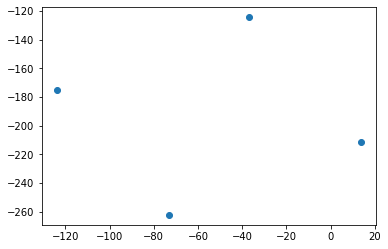

In [167]:
plt.scatter(tsne_df[:, 0], tsne_df[:, 1])
plt.show()